# Active Subspaces: A Simple Example


Here we mimic Paul Constantine's "basic" tutorial in active subspaces, using an even simpler toy function of only three variables. All text directly copied from Paul's original notebook are cited with quotations throughout this notebook.

The function we use for demonstration is

$$
f = x^2y^2z^2
$$

and distributions of each varibale are summarized below.

Symbol|Distribution (U(min, max))
:-----:|:-----
$x$|U(150, 200)
$y$|U(220, 300)
$z$|U(6, 10)


"For demonstration we initially pretend we don't have the gradient of $f$. In this scenario, you have 3 options: use a global linear model to approximate gradients, use a global quadratic model to approximate gradients, or use local linear models to approximate gradients. We demonstrate each in turn." - Paul C.



In [9]:
%matplotlib inline
import active_subspaces as ac
import numpy as np
import matplotlib.pyplot as plt

def fun(aa):
    #each row of aa should be [x ,y ,z] in the normalized input space
    #returns column vector of function at each row of inputs
    
    a = aa.copy()
    a = np.atleast_2d(a)
    M = a.shape[0]
    
    x = a[:,0]; y = a[:,1]; z = a[:,2]
    
    return (x**2*y**2*z**2).reshape(M, 1)

"We first draw a set of inputs from the parameter space according to the distributions in the table above and compute the function's value at each of these points." - Paul C.


In [10]:
M = 1000 #This is the number of data points to use

#Sample the input space according to the distributions in the table above
x = np.random.uniform(150, 200, (M, 1))
y = np.random.uniform(220, 300, (M, 1))
z = np.random.uniform(6, 10, (M, 1))


#The input matrix
a = np.hstack((x, y, z))

#The function's output
f = fun(a)

#Upper and lower limits for inputs
ub = np.array([150, 220, 6]).reshape((1, 3))
lb = np.array([200, 300, 10]).reshape((1, 3))

#We normalize the inputs to the interval [-1, 1]: 

aa = 2.*(a - lb)/(ub - lb) - 1.0

"The following cell instantiates a subspace object and computes the active subspace by fitting a global linear model (this is indicated by the 'sstype='OLS'' flag). The 'nboot=100' flag says to use 100 bootstrap replicates to estimate variability in eigenvalue and subspace error estimates."

-Paul C.



In [11]:
#Instantiate a subspace object
ss = ac.subspaces.Subspaces()

#Compute the subspace with a global linear model (sstype='OLS') and 100 bootstrap replicates
ss.compute(X=aa, f=f, nboot=100, sstype='OLS')

"We plot estimated eigenvalues, subspace errors, and a sufficient summary plot (a plot of the active variable vs data values)."

-Paul C.

/home/students/halljord/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


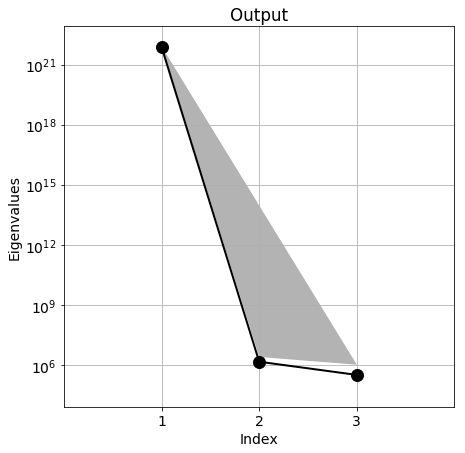

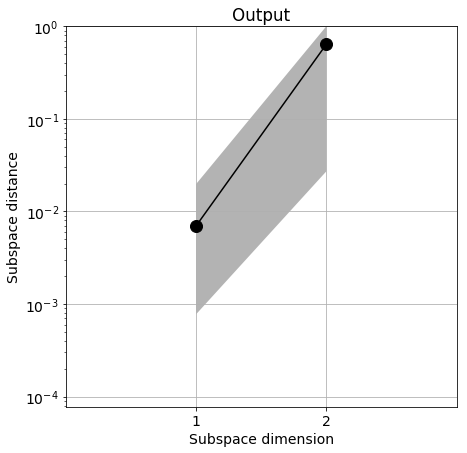

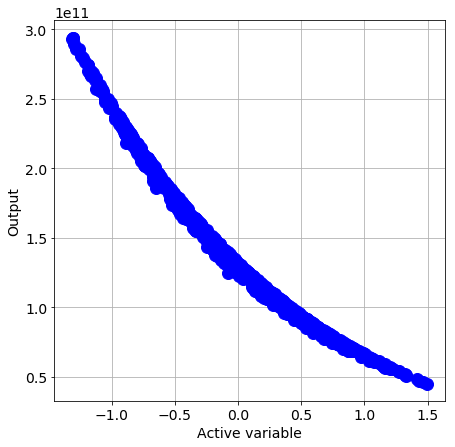

In [12]:
#This plots the eigenvalues (ss.eigenvals) with bootstrap ranges (ss.e_br)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)

#This plots subspace errors with bootstrap ranges (all contained in ss.sub_br)
ac.utils.plotters.subspace_errors(ss.sub_br)

#This makes sufficient summary plots with the active variables (XX.dot(ss.W1)) and output (f)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

"We now make the same plots with a global quadratic model (sstype='QPHD')." - Paul C.

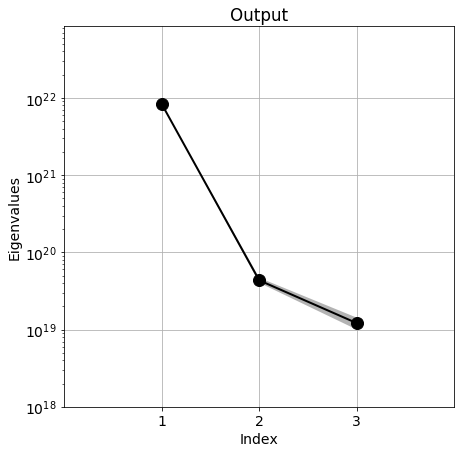

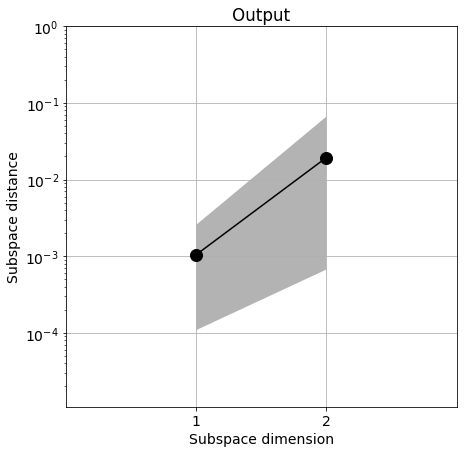

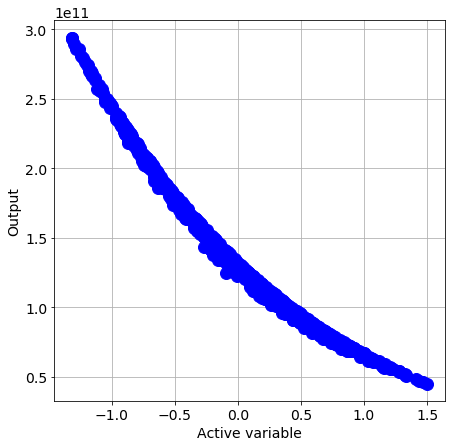

In [13]:
ss.compute(X=aa, f=f, nboot=100, sstype='QPHD')
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)

"We now use local linear models to approximate gradients and make the same plots as above." - Paul C.

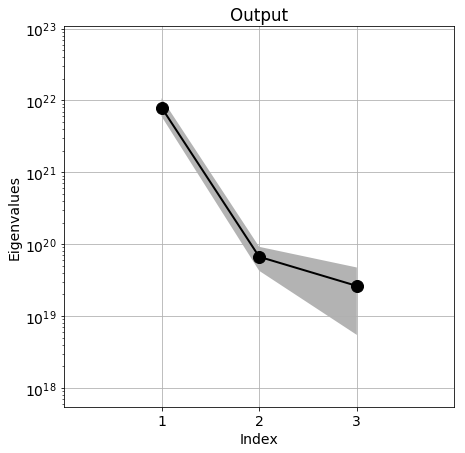

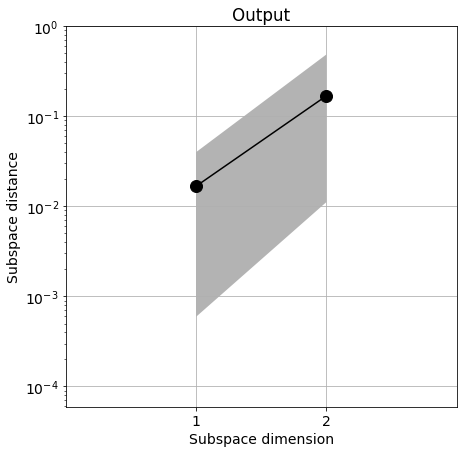

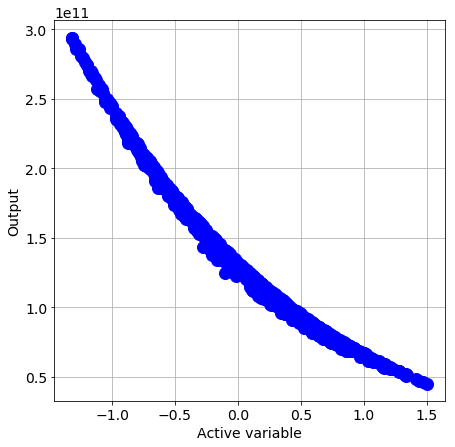

In [14]:
df = ac.gradients.local_linear_gradients(aa, f) #Estimated gradients using local linear models

ss.compute(df=df, nboot=100)
ac.utils.plotters.eigenvalues(ss.eigenvals, ss.e_br)
ac.utils.plotters.subspace_errors(ss.sub_br)
ac.utils.plotters.sufficient_summary(aa.dot(ss.W1), f)